In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def fix_csv(metadata):
    """
    Fix the paths in the metadata CSV by replacing incorrect parts of the path
    
    Removes NaN rows in the metadata CSV.
    """
    metadata.dropna(inplace=True) # remove missing values

    # Replace the incorrect directory name with the correct one
    metadata['path_to_image'] = metadata['path_to_image'].apply(
        lambda x: x.replace('BreaKHis_v1/', 'BreaKHis_v1 2/')
    )
    
    return metadata

In [4]:
# DEFINE DIRECTORY PATH FOR DATASET (\DeepLearning24_25\)
# ---------------------------------
source_directory = r"D:\DeepLearning24_25"
# ---------------------------------
path_img_metadata = os.path.join(source_directory, 'BreaKHis_v1 2/histology_slides/breast/image_data.csv')
img_metadata_df = pd.read_csv(path_img_metadata)

In [5]:
img_metadata_df.isnull().sum()

path_to_image          0
Benign or Malignant    3
Cancer Type            4
Magnification          4
dtype: int64

In [6]:
img_metadata_df = fix_csv(img_metadata_df)
img_metadata_df.head(3)

,path_to_image,Benign or Malignant,Cancer Type,Magnification
0,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
1,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X
2,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X


In [7]:
img_metadata_df.isnull().sum()

path_to_image          0
Benign or Malignant    0
Cancer Type            0
Magnification          0
dtype: int64

In [9]:
# add location of the image to the dataframe (using last bit of path_to_image and searching for it in the train/test/val folders inside the data folder)

img_metadata_df['image_name'] = img_metadata_df['path_to_image'].apply(lambda x: x.split('/')[-1])
img_metadata_df['image_location'] = img_metadata_df['image_name'].apply(
    lambda x: 'Train' if os.path.exists(os.path.join('data/train', x)) 
    else 'Test' if os.path.exists(os.path.join('data/test', x)) 
    else 'Val' if os.path.exists(os.path.join('data/val', x)) 
    else 'Not_Found'
)

img_metadata_df.head(3)

,path_to_image,Benign or Malignant,Cancer Type,Magnification,image_name,image_location
0,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X,SOB_B_A-14-22549AB-100-011.png,Train
1,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X,SOB_B_A-14-22549AB-100-005.png,Test
2,BreaKHis_v1 2/histology_slides/breast/benign/S...,Benign,Adenosis,100X,SOB_B_A-14-22549AB-100-004.png,Train


In [10]:
# count values of image_location
img_metadata_df['image_location'].value_counts()

Train    5533
Test     1186
Val      1186
Name: image_location, dtype: int64

NaN values are dealt with in the initial data setup (`setup_data.py`)

**IMPORTANT:** run `setup_data.py`

Class Distribution:
 Malignant    7905
Name: label, dtype: int64

Image Resolutions:
         width       height
count  7905.0  7905.000000
mean    700.0   459.962555
std       0.0     0.385221
min     700.0   456.000000
25%     700.0   460.000000
50%     700.0   460.000000
75%     700.0   460.000000
max     700.0   460.000000


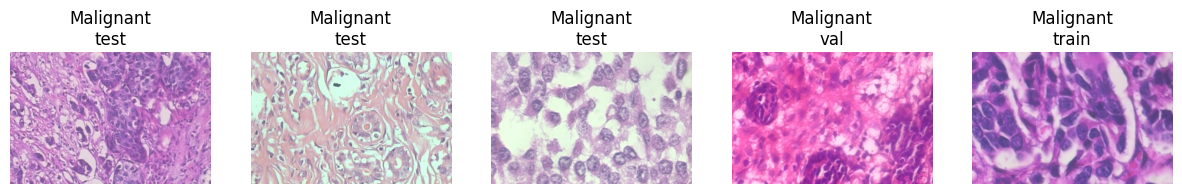

In [ ]:
# Check image resolutions and aspect ratios
def check_image_resolutions(metadata):
    resolutions = []
    for idx, row in metadata.iterrows():
        try:
            with Image.open(row['path_to_image']) as img:
                resolutions.append(img.size)
        except Exception as e:
            print(f"Error loading image {row['path_to_image']}: {e}")
    return resolutions

resolutions = check_image_resolutions(metadata)
resolutions_df = pd.DataFrame(resolutions, columns=['width', 'height'])
print("\nImage Resolutions:\n", resolutions_df.describe())

# Visualize sample images
def visualize_samples(metadata, num_samples=5):
    samples = metadata.sample(num_samples)
    plt.figure(figsize=(15, 5))
    for i, (idx, row) in enumerate(samples.iterrows()):
        img = Image.open(row['path_to_image'])
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{row['label']}\n{row['cancer_type']}")
        plt.axis('off')
    plt.show()

visualize_samples(metadata)